In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime
print(f"the last edit is :{datetime.datetime.now()}")

the last edit is :2025-07-12 07:32:04.806913


In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-07-12 07:32:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.251.18.207, 192.178.156.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.8MB/s    in 3.1s    

2025-07-12 07:32:08 (33.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [8]:
import os

for dirpaths, dirnames, filenmae in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories {len(filenmae)} in {dirpaths}")

there are 2 directories 0 in pizza_steak
there are 2 directories 0 in pizza_steak/train
there are 0 directories 750 in pizza_steak/train/pizza
there are 0 directories 750 in pizza_steak/train/steak
there are 2 directories 0 in pizza_steak/test
there are 0 directories 250 in pizza_steak/test/pizza
there are 0 directories 250 in pizza_steak/test/steak


In [9]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 12 07:32 .
drwxr-xr-x 1 root root 4096 Jul 12 07:32 ..
drwxr-xr-x 4 root root 4096 Jul 12 07:32 test
drwxr-xr-x 4 root root 4096 Jul 12 07:32 train


In [10]:
num_images_in_dir = len(os.listdir("pizza_steak/train/pizza"))
num_images_in_dir

750

In [11]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [13]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (384, 512, 3)


array([[[128, 127, 107],
        [128, 127, 106],
        [129, 128, 107],
        ...,
        [ 75,  79,  52],
        [ 88,  88,  62],
        [102, 100,  75]],

       [[129, 126, 107],
        [134, 133, 112],
        [137, 135, 114],
        ...,
        [ 81,  87,  61],
        [ 81,  83,  59],
        [ 86,  86,  62]],

       [[128, 123, 104],
        [135, 133, 112],
        [140, 135, 115],
        ...,
        [ 81,  89,  66],
        [ 70,  75,  53],
        [ 64,  67,  46]],

       ...,

       [[ 92,  93,  95],
        [ 92,  92,  92],
        [ 94,  90,  89],
        ...,
        [ 95, 100,  93],
        [ 92,  97,  90],
        [ 95, 100,  93]],

       [[ 96,  96,  98],
        [ 96,  94,  95],
        [ 99,  93,  93],
        ...,
        [105, 110, 103],
        [103, 110, 102],
        [105, 112, 104]],

       [[ 97,  97,  99],
        [ 98,  96,  97],
        [104,  95,  96],
        ...,
        [116, 121, 114],
        [116, 123, 115],
        [117, 124, 116]]], dtype=uint8)
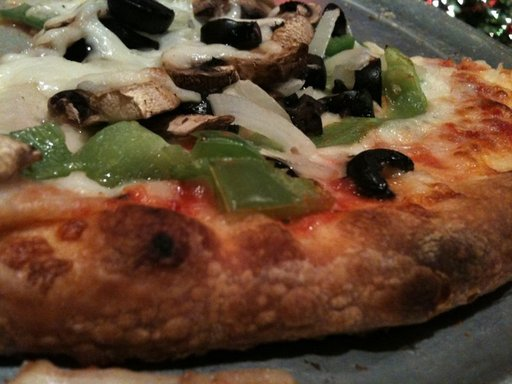

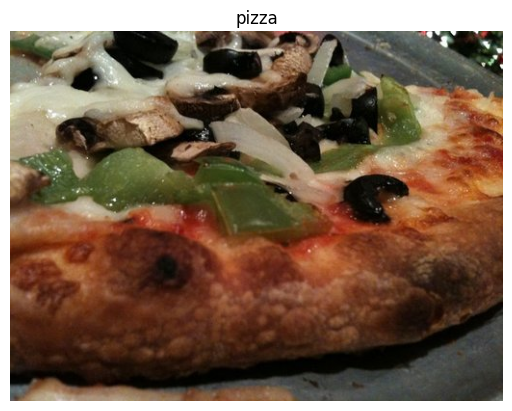

In [14]:
img = view_random_image("pizza_steak/train/", "pizza")
img

In [15]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[128, 127, 107],
        [128, 127, 106],
        [129, 128, 107],
        ...,
        [ 75,  79,  52],
        [ 88,  88,  62],
        [102, 100,  75]],

       [[129, 126, 107],
        [134, 133, 112],
        [137, 135, 114],
        ...,
        [ 81,  87,  61],
        [ 81,  83,  59],
        [ 86,  86,  62]],

       [[128, 123, 104],
        [135, 133, 112],
        [140, 135, 115],
        ...,
        [ 81,  89,  66],
        [ 70,  75,  53],
        [ 64,  67,  46]],

       ...,

       [[ 92,  93,  95],
        [ 92,  92,  92],
        [ 94,  90,  89],
        ...,
        [ 95, 100,  93],
        [ 92,  97,  90],
        [ 95, 100,  93]],

       [[ 96,  96,  98],
        [ 96,  94,  95],
        [ 99,  93,  93],
        ...,
        [105, 110, 103],
        [103, 110, 102],
        [105, 112, 104]],

       [[ 97,  97,  99],
        [ 98,  96,  97],
        [104,  95,  96],
        ...,
        [116, 121, 11

In [16]:
img.shape

(384, 512, 3)

In [17]:
img/255.

array([[[0.50196078, 0.49803922, 0.41960784],
        [0.50196078, 0.49803922, 0.41568627],
        [0.50588235, 0.50196078, 0.41960784],
        ...,
        [0.29411765, 0.30980392, 0.20392157],
        [0.34509804, 0.34509804, 0.24313725],
        [0.4       , 0.39215686, 0.29411765]],

       [[0.50588235, 0.49411765, 0.41960784],
        [0.5254902 , 0.52156863, 0.43921569],
        [0.5372549 , 0.52941176, 0.44705882],
        ...,
        [0.31764706, 0.34117647, 0.23921569],
        [0.31764706, 0.3254902 , 0.23137255],
        [0.3372549 , 0.3372549 , 0.24313725]],

       [[0.50196078, 0.48235294, 0.40784314],
        [0.52941176, 0.52156863, 0.43921569],
        [0.54901961, 0.52941176, 0.45098039],
        ...,
        [0.31764706, 0.34901961, 0.25882353],
        [0.2745098 , 0.29411765, 0.20784314],
        [0.25098039, 0.2627451 , 0.18039216]],

       ...,

       [[0.36078431, 0.36470588, 0.37254902],
        [0.36078431, 0.36078431, 0.36078431],
        [0.36862745, 0

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)
test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding= "valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.5586 - loss: 0.6797 - val_accuracy: 0.8180 - val_loss: 0.4728
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.7568 - loss: 0.5088 - val_accuracy: 0.8160 - val_loss: 0.4043
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7932 - loss: 0.4459 - val_accuracy: 0.8500 - val_loss: 0.3630
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.8311 - loss: 0.3871 - val_accuracy: 0.8820 - val_loss: 0.3380
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.8241 - loss: 0.3854 - val_accuracy: 0.8740 - val_loss: 0.3164


In [20]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [21]:
len(train_data)

47

In [22]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(), optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.4931 - loss: 0.7194 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4924 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.4868 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5067 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [23]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Hmmm our model is poorly in accuracy, so let's add more hidden layers

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5983 - loss: 6.5887 - val_accuracy: 0.7400 - val_loss: 0.9329
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.7370 - loss: 0.9028 - val_accuracy: 0.7040 - val_loss: 0.7884
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.6715 - loss: 1.6034 - val_accuracy: 0.7420 - val_loss: 0.5939
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7641 - loss: 0.6125 - val_accuracy: 0.7820 - val_loss: 0.4833
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7777 - loss: 0.4723 - val_accuracy: 0.7920 - val_loss: 0.4767


In [25]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Image shape: (512, 512, 3)


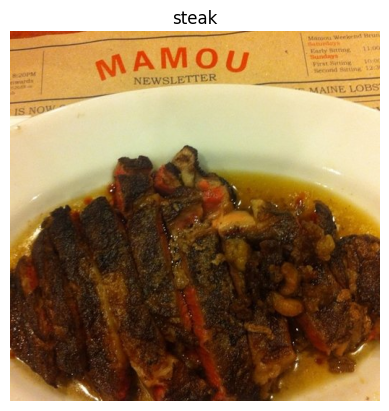

In [26]:
plt.figure()
plt.subplots=(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

Image shape: (512, 512, 3)


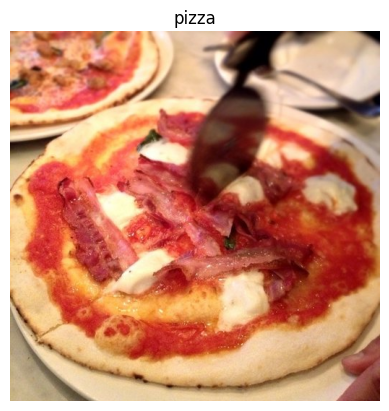

In [27]:
plt.subplots=(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [28]:
train_dir = "/content/pizza_steak/train/"
test_dir = "/content/pizza_steak/test/"

In [29]:
!nvidia-smi

Sat Jul 12 07:34:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P0             28W /   70W |    1690MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
images, labels= next(train_data)
len(images), len(labels)

(32, 32)

In [33]:
images[:2]

array([[[[0.56078434, 0.63529414, 0.79215693],
         [0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         ...,
         [0.07843138, 0.08235294, 0.05882353],
         [0.08235294, 0.08235294, 0.07450981],
         [0.09803922, 0.09803922, 0.09803922]],

        [[0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         ...,
         [0.09803922, 0.10196079, 0.07058824],
         [0.0627451 , 0.06666667, 0.04705883],
         [0.04313726, 0.04313726, 0.03529412]],

        [[0.5686275 , 0.6431373 , 0.8078432 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         [0.5647059 , 0.6392157 , 0.8078432 ],
         ...,
         [0.07450981, 0.07843138, 0.04705883],
         [0.15686275, 0.16078432, 0.13725491],
         [0.21568629, 0.21960786, 0.20000002]],

        ...,

        [[0.3921569 , 0.34901962, 0.22352943],
         [0.39607847, 0.3529412 , 0.23529413]

In [34]:
images[0].shape

(224, 224, 3)

In [35]:
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

###**Create a model (start with a baseline)**

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [37]:
model_4= Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

[Kernel size](https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean)

In [38]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

###**Fit the model**

In [39]:
len(train_data), len(test_data)

(47, 16)

In [40]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.5323 - loss: 1.0419 - val_accuracy: 0.6960 - val_loss: 0.5441
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.7577 - loss: 0.5203 - val_accuracy: 0.7780 - val_loss: 0.5190
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8401 - loss: 0.3993 - val_accuracy: 0.7980 - val_loss: 0.5179
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9330 - loss: 0.2020 - val_accuracy: 0.8020 - val_loss: 0.4551
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9924 - loss: 0.0467 - val_accuracy: 0.7360 - val_loss: 0.7865


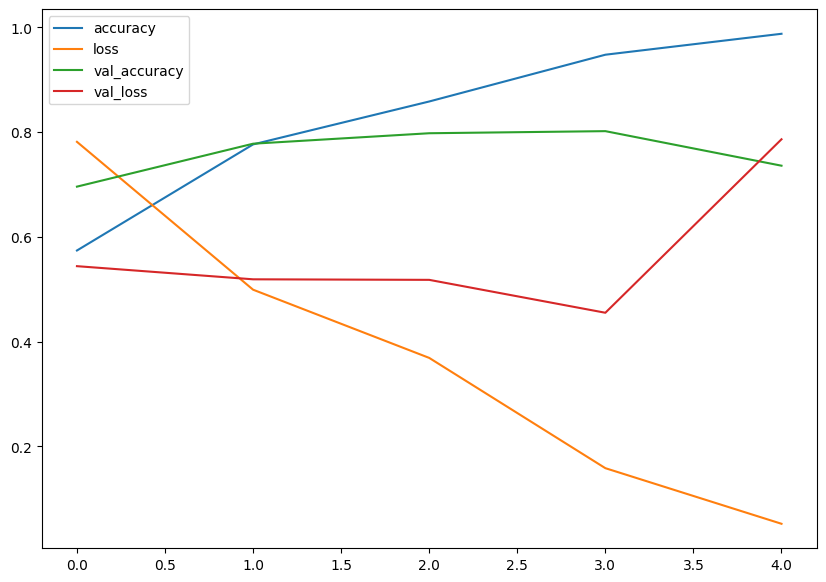

In [41]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [42]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8613 - loss: 0.3347


[0.31641876697540283, 0.8740000128746033]

In [44]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7552 - loss: 0.7075


[0.7864645719528198, 0.7360000014305115]